In [1]:
import pandas as pd
import os
import sys
import numpy as np
#import helper
#import dataset_path
#from helpers import *
from sklearn.impute import SimpleImputer
#from dataset_path import output_path,mimic_iv_path
#path = output_path
path = '../mimic-iv-ed/mimic-iv-ed-2.0/2.0/ed/triage.csv.gz'
df_triage = pd.read_csv(os.path.join(path))
#pd.set_option('display.max_columns', 100)
TriageDataframe = pd.DataFrame(df_triage)
df_triage.head(len(df_triage))
#TriageDataTransposed=TriageDataframe.T
#df_triage.to_csv('../Data/TriagePreprocessed_data.csv')
#TriageDataTransposed.head(len(TriageDataTransposed))
#print(df_master)

subject_id   stay_id  temperature  heartrate  resprate  o2sat    sbp  \
0         10000032  32952584         97.8       87.0      14.0   97.0   71.0   
1         10000032  33258284         98.4       70.0      16.0   97.0  106.0   
2         10000032  35968195         99.4      105.0      18.0   96.0  106.0   
3         10000032  38112554         98.9       88.0      18.0   97.0  116.0   
4         10000032  39399961         98.7       77.0      16.0   98.0   96.0   
...            ...       ...          ...        ...       ...    ...    ...   
447707    19999784  37972930         98.0       91.0      16.0   99.0  148.0   
447708    19999828  30712109         98.1       83.0      18.0  100.0  107.0   
447709    19999828  32917002         96.6      112.0      18.0  100.0  110.0   
447710    19999914  32002659         99.5       81.0      10.0  100.0   93.0   
447711    19999987  34731548          NaN        NaN       NaN    NaN    NaN   

         dbp pain  acuity                            chiefcomplaint  
0       43.0    7     2.0                               Hypotension  
1       63.0    0     3.0            Abd pain, Abdominal distention  
2       57.0   10     3.0                           n/v/d, Abd pain  
3       88.0   10     3.0                      Abdominal distention  
4       50.0   13     2.0  Abdominal distention, Abd pain, LETHAGIC  
...      ...  ...     ...                                       ...  
447707  90.0    5     2.0                              Abnormal MRI  
447708  75.0    8     2.0                      Abd pain, Wound eval  
447709  82.0    4     2.0                      Abd pain, Wound eval  
447710  55.0    0     2.0      Altered mental status, Substance use  
447711   NaN  NaN     NaN                                HEAD BLEED  

[447712 rows x 11 columns]

In [2]:
df_triage.isna().sum()

subject_id            0
stay_id               0
temperature       24595
heartrate         17958
resprate          21375
o2sat             21649
sbp               19225
dbp               20068
pain              13617
acuity             7328
chiefcomplaint       23
dtype: int64

In [3]:
df_triage.dropna()

subject_id   stay_id  temperature  heartrate  resprate  o2sat    sbp  \
0         10000032  32952584         97.8       87.0      14.0   97.0   71.0   
1         10000032  33258284         98.4       70.0      16.0   97.0  106.0   
2         10000032  35968195         99.4      105.0      18.0   96.0  106.0   
3         10000032  38112554         98.9       88.0      18.0   97.0  116.0   
4         10000032  39399961         98.7       77.0      16.0   98.0   96.0   
...            ...       ...          ...        ...       ...    ...    ...   
447706    19999784  35692999         98.6       80.0      18.0  100.0  161.0   
447707    19999784  37972930         98.0       91.0      16.0   99.0  148.0   
447708    19999828  30712109         98.1       83.0      18.0  100.0  107.0   
447709    19999828  32917002         96.6      112.0      18.0  100.0  110.0   
447710    19999914  32002659         99.5       81.0      10.0  100.0   93.0   

          dbp pain  acuity                            chiefcomplaint  
0        43.0    7     2.0                               Hypotension  
1        63.0    0     3.0            Abd pain, Abdominal distention  
2        57.0   10     3.0                           n/v/d, Abd pain  
3        88.0   10     3.0                      Abdominal distention  
4        50.0   13     2.0  Abdominal distention, Abd pain, LETHAGIC  
...       ...  ...     ...                                       ...  
447706  100.0    0     3.0                            L Leg weakness  
447707   90.0    5     2.0                              Abnormal MRI  
447708   75.0    8     2.0                      Abd pain, Wound eval  
447709   82.0    4     2.0                      Abd pain, Wound eval  
447710   55.0    0     2.0      Altered mental status, Substance use  

[410043 rows x 11 columns]

In [4]:
#chiefcomplaint = df_triage.pop()

TypeError: DataFrame.pop() missing 1 required positional argument: 'item'

In [5]:
sys = np.array(df_triage["sbp"])
dias = np.array(df_triage["dbp"])
hr_vec = np.array(df_triage["heartrate"])
#print(sys)
PP = np.array(sys - dias)
NewData = data = [dias,sys,PP,hr_vec]
NewDataframe = pd.DataFrame(NewData)
DataTransposed=NewDataframe.T
DataTransposed.to_csv('../Data/preprocessed_data.csv')

#Cardiac Output Estimation 
EstCO = []
for i in range(0,len(hr_vec),1):
    tco = hr_vec[i]*PP[i]*0.002
    EstCO.append(tco)

print("Estimated CO",EstCO)
DataF_CO=pd.DataFrame(EstCO)
DataF_CO.to_csv('../Data/esimatedCO.csv')

Estimated CO [4.872, 6.0200000000000005, 10.290000000000001, 4.928, 7.0840000000000005, 6.708, 6.24, 5.146, 9.8, 13.938, 8.28, 7.938, 10.71, 10.53, 12.272, 13.284, 8.526, 11.8, 6.72, 12.18, 9.752, 9.882, 7.8020000000000005, 8.064, 7.728, 8.64, 11.592, 10.692, 11.088000000000001, 12.636000000000001, 10.56, 11.232000000000001, 8.28, 11.832, 7.832, 7.638, 7.84, nan, 14.454, 9.072000000000001, 10.488, 12.32, 6.678, 9.94, 8.97, 9.6, 6.7, 9.152000000000001, 4.76, 30.69, 15.232000000000001, 21.34, 14.008000000000001, 5.55, 9.396, 7.32, 9.328, 5.412, 8.47, 6.298, 6.192, 8.568, 11.952, 11.73, 5.6160000000000005, 5.5200000000000005, 9.120000000000001, nan, 6.716, 8.624, 16.48, 12.96, 11.200000000000001, nan, 6.7, 13.104000000000001, 10.804, 2.86, 8.0, 14.74, 6.688, 11.55, 7.6160000000000005, 8.576, 8.192, 11.972, 12.264000000000001, 9.198, 8.3, 6.0840000000000005, 9.76, 9.120000000000001, 16.94, 8.32, 13.5, 20.202, 11.21, 19.44, 5.658, 10.912, 7.236, 17.596, 14.632, 14.208, 7.36, 7.8, 7.2, 8.88,

In [6]:
import pandas as pd
  
read_file = pd.read_excel ("../Data/CO Dataset/Data reposiroty.xlsx")
read_file.to_csv ("DataRepo.csv", 
                  index = None,
                  header=True)
    
Main_df = pd.DataFrame(pd.read_csv("DataRepo.csv"))
DataFrame = Main_df.drop([
'Ramp_protocol CPET',
'Eziologia',
'VO2_AT',
'VO2_AT_Kg',
'VO2_peak',
'VO2_peak_Kg',
'VO2_peak_perc','NYHA','PetCO2 @ AT','iRamp_protocol INNOCOR'], axis="columns")
#Data = Main_df.drop(['Antialdo','AT'],axis='columns')

DataFrame.head(171)

ID  Age  Gender  Weight  Height        BMI  Causa interruzione test   \
0     ID01   48       1      64     167  22.948116                         0   
1     ID02   55       1      79     178  24.933720                         0   
2     ID03   63       1      90     172  30.421850                         0   
3     ID04   56       1      82     167  29.402273                         0   
4     ID05   75       1      74     171  25.306932                         0   
..     ...  ...     ...     ...     ...        ...                       ...   
165  ID166   75       1      85     176  27.440599                         1   
166  ID167   76       1      65     175  21.224490                         1   
167  ID168   59       0      93     167  33.346481                         1   
168  ID169   75       1      79     178  24.933720                         1   
169  ID170   70       1      65     163  24.464602                         1   

        Lenght  AT  HR_AT  ...  Antialdo  Digitalis  Unnamed: 77  FEV1  FEV1%  \
0     8.833333   1   92.0  ...       0.0        0.0          NaN  3.15   94.0   
1     5.800000   1   77.0  ...       0.0        0.0          NaN  1.84   51.0   
2     7.700000   1   98.0  ...       0.0        0.0          NaN  2.12   79.0   
3    10.600000   0    NaN  ...       1.0        0.0          NaN   NaN    NaN   
4     6.875000   1   75.0  ...       0.0        0.0          NaN   NaN    NaN   
..         ...  ..    ...  ...       ...        ...          ...   ...    ...   
165   8.866667   1   96.0  ...       1.0        0.0          NaN  2.95  102.0   
166   8.375000   1   77.0  ...       0.0        0.0          NaN  2.03   74.0   
167  10.625000   1   81.0  ...       1.0        0.0          NaN  2.09   83.0   
168   8.875000   1   74.0  ...       1.0        0.0          NaN  2.42   81.0   
169  10.500000   1  101.0  ...       1.0        0.0          NaN   NaN    NaN   

      FVC  FVC%  Unnamed: 82  Unnamed: 83  Unnamed: 84  
0    4.06  99.0          NaN          NaN          NaN  
1    2.97  66.0          NaN          NaN          NaN  
2    2.97  83.0          NaN          NaN          NaN  
3     NaN   NaN          NaN          NaN          NaN  
4     NaN   NaN          NaN          NaN          NaN  
..    ...   ...          ...          ...          ...  
165  3.59  93.0          NaN          NaN          NaN  
166  2.22  61.0          NaN          NaN          NaN  
167  2.69  90.0          NaN          NaN          NaN  
168  2.78  70.0          NaN          NaN          NaN  
169   NaN   NaN          NaN          NaN          NaN  

[170 rows x 75 columns]

In [6]:
DataFrame.isna().sum()

ID               0
Age              0
Gender           0
Weight           0
Height           0
              ... 
FVC             62
FVC%            62
Unnamed: 82    170
Unnamed: 83    170
Unnamed: 84    169
Length: 75, dtype: int64

In [10]:
DataFrame.dropna(axis=1)

ID  Age  Gender  Weight  Height        BMI  Causa interruzione test   \
0     ID01   48       1      64     167  22.948116                         0   
1     ID02   55       1      79     178  24.933720                         0   
2     ID03   63       1      90     172  30.421850                         0   
3     ID04   56       1      82     167  29.402273                         0   
4     ID05   75       1      74     171  25.306932                         0   
..     ...  ...     ...     ...     ...        ...                       ...   
165  ID166   75       1      85     176  27.440599                         1   
166  ID167   76       1      65     175  21.224490                         1   
167  ID168   59       0      93     167  33.346481                         1   
168  ID169   75       1      79     178  24.933720                         1   
169  ID170   70       1      65     163  24.464602                         1   

        Lenght  AT  HR_perc_pred  Watt_peak  Polso_peak  VE_VCO2_S  \
0     8.833333   1            88        106         8.7       29.6   
1     5.800000   1            58         58         8.6       21.6   
2     7.700000   1            63         77        12.3       32.0   
3    10.600000   0            81        106        11.3       28.0   
4     6.875000   1            65         55         7.6       30.0   
..         ...  ..           ...        ...         ...        ...   
165   8.866667   1            92        133        12.6       28.7   
166   8.375000   1            83         67        10.8       27.2   
167  10.625000   1            60         85        16.2       29.5   
168   8.875000   1            58         71        10.9       29.7   
169  10.500000   1            81         63         8.0       30.8   

     Pet CO2_ peak  VE_peak  RQ_peak    Hb  
0             28.7     69.0     1.30  15.0  
1             36.9     27.2     1.05  14.5  
2             36.1     40.5     1.06  14.0  
3             34.5     17.9     1.08  15.0  
4             32.6     35.4     1.18  13.0  
..             ...      ...      ...   ...  
165           34.3     70.1     1.12  15.0  
166           34.1     44.5     1.14  14.0  
167           31.8     57.1     1.03  14.0  
168           30.7     37.7     1.04  12.0  
169           33.3     38.2     1.07  15.0  

[170 rows x 17 columns]

In [ ]:
hr_vec2 = np.array(DataFrame["HR_perc_pred"])
sv = np.array(DataFrame["SV picco"])
#print(sys)
#PP = np.array(sys - dias)
InputData2 = [hr_vec2,sv]
InputDataframe2 = pd.DataFrame(InputData2)
InputDataframe2=InputDataframe2.T
InputDataframe2.columns = ['HR','SV']
#DataTransposed.head()
InputDataframe2.to_csv('../Data/Input_data2.csv')

#Cardiac Output Estimation 
EstCO2 = []
for i in range(0,len(hr_vec2),1):
    tco = hr_vec2[i]*sv[i]*0.001
    EstCO2.append(tco)

#print("Estimated CO",EstCO)
DataF_CO2=pd.DataFrame(EstCO2)
DataF_CO2.columns = ['CO_est']
DataF_CO2.head(170)
#DataF_CO.to_csv('../Data/esimatedCO.csv')

In [ ]:
%pip install tensorflow

In [ ]:
%pip install tf-nightly

2.8.0


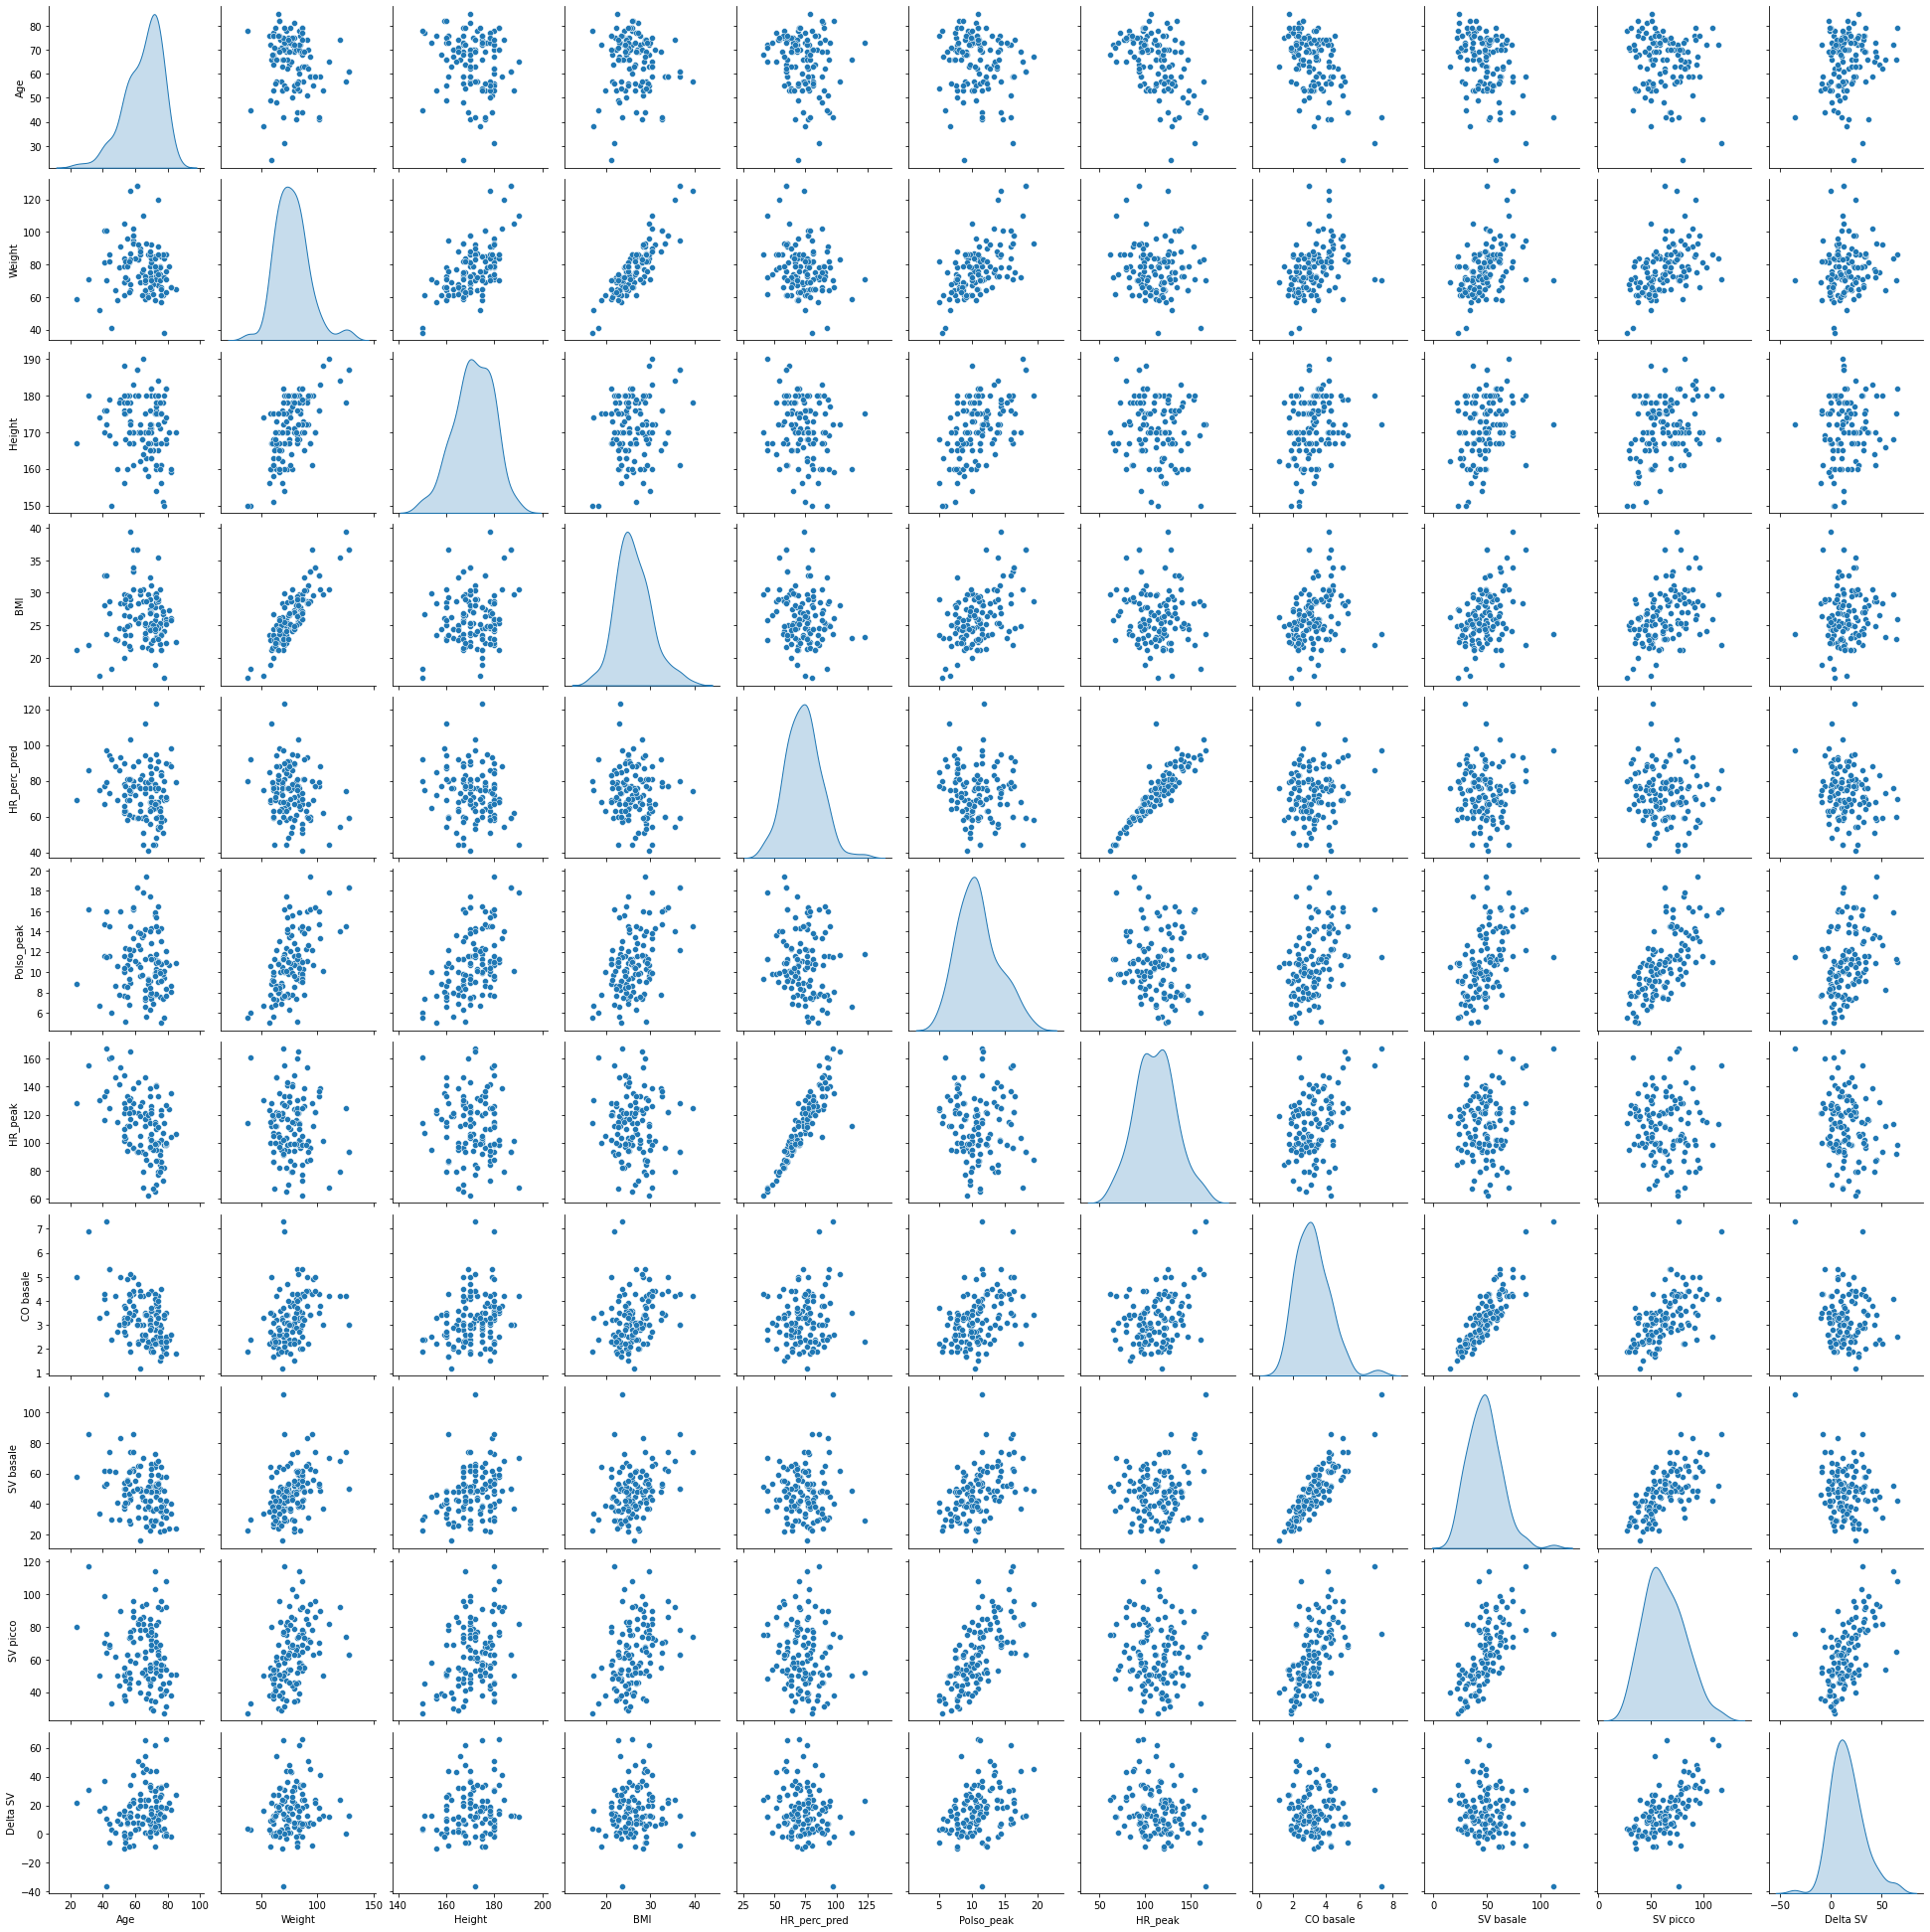

In [33]:
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras import layers

print(tf.__version__)

train_data = DataFrame.sample(frac=0.75, random_state=0)
test_data = DataFrame.drop(train_data.index)

#Joint Distribution of training data
sn.pairplot(train_data[['Age',
                        'Weight',
                        'Height',
                        'BMI',
                        'HR_perc_pred',
                        'Polso_peak',
                        'HR_peak',
                        'CO basale',
                        'SV basale',
                        'SV picco',
                        'Delta SV']],diag_kind="kde")

In [7]:
train_stats = train_data.describe()
train_stats.pop('SV picco')
train_stats.transpose()
print(train_stats['CO basale'])

NameError: name 'train_data' is not defined